In [1]:
import earthaccess
import xarray as xr
from xarray.backends.api import open_datatree
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import matplotlib.animation as animation
import os

In [2]:
auth = earthaccess.login(persist=True)

In [3]:
results = earthaccess.search_datasets(instrument="oci")

In [4]:
for item in results:
    summary = item.summary()
    print(summary["short-name"])

PACE_OCI_L0_SCI
PACE_OCI_L1A_SCI
PACE_OCI_L1B_SCI
PACE_OCI_L1C_SCI
PACE_OCI_L2_AOP_NRT
PACE_OCI_L2_BGC_NRT
PACE_OCI_L2_IOP_NRT
PACE_OCI_L2_PAR_NRT
PACE_OCI_L3B_CHL_NRT
PACE_OCI_L3B_IOP_NRT
PACE_OCI_L3B_KD_NRT
PACE_OCI_L3B_PAR_NRT
PACE_OCI_L3B_POC_NRT
PACE_OCI_L3B_RRS_NRT
PACE_OCI_L3M_CHL_NRT
PACE_OCI_L3M_IOP_NRT
PACE_OCI_L3M_KD_NRT
PACE_OCI_L3M_PAR_NRT
PACE_OCI_L3M_POC_NRT
PACE_OCI_L3M_RRS_NRT


In [6]:
tspan = ("2024-07-14", "2024-08-10")
#bbox = (-58, 37.5, -52, 41) #howie
bbox = (-73, 35, -70, 37) #edward
# bbox=(-61, 34, -59, 39) #patrick
clouds = (0, 100)

In [7]:
results = earthaccess.search_data(
    short_name="PACE_OCI_L2_BGC_NRT",
    temporal=tspan,
    bounding_box=bbox,
    cloud_cover=clouds,
)

In [8]:
paths = earthaccess.open(results) #'streaming' data

QUEUEING TASKS | :   0%|          | 0/32 [00:00<?, ?it/s]

PROCESSING TASKS | :   0%|          | 0/32 [00:00<?, ?it/s]

COLLECTING RESULTS | :   0%|          | 0/32 [00:00<?, ?it/s]

In [9]:
paths

[<File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240714T171003.L2.OC_BGC.V2_0.NRT.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240715T174440.L2.OC_BGC.V2_0.NRT.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240716T164059.L2.OC_BGC.V2_0.NRT.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240716T181917.L2.OC_BGC.V2_0.NRT.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240717T171535.L2.OC_BGC.V2_0.NRT.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240718T161154.L2.OC_BGC.V2_0.NRT.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240718T175012.L2.OC_BGC.V2_0.NRT.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240719T164630.L2.OC_BGC.V2_0.NRT.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public/PACE_OCI.20240719T182449.L2.OC_BGC.V2_0.NRT.nc>,
 <File-like object S3FileSystem, ob-cumulus-prod-public

/tmp/ipykernel_838/4256946355.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


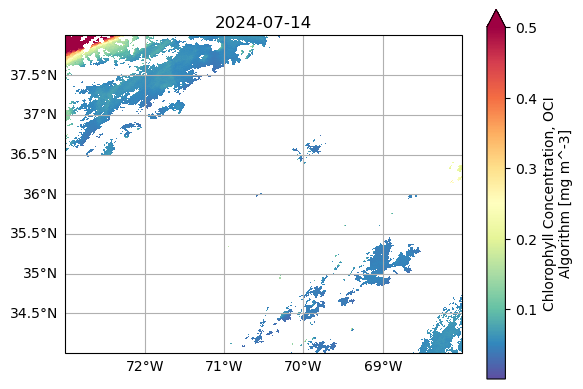

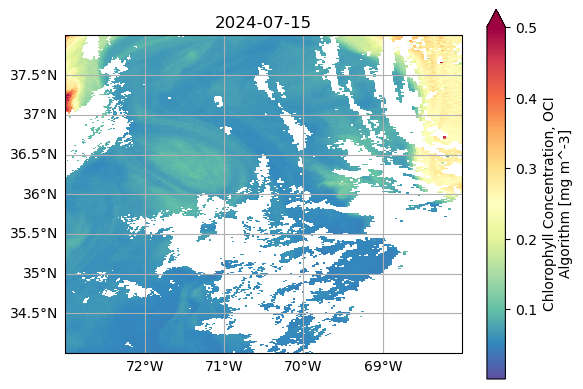

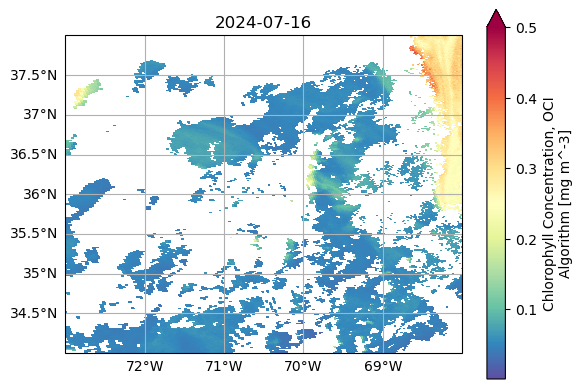

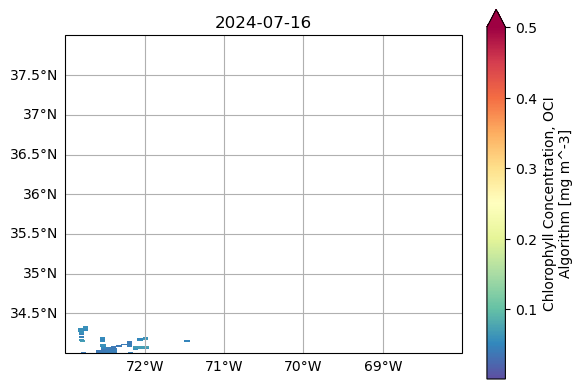

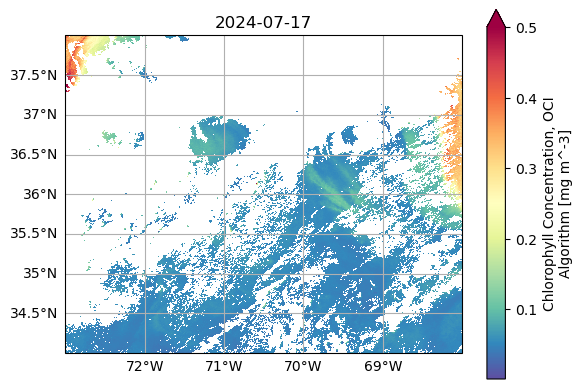

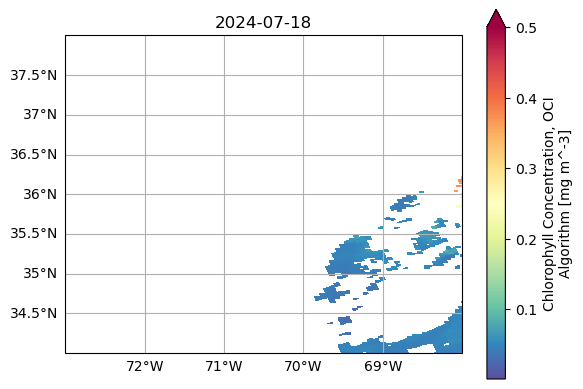

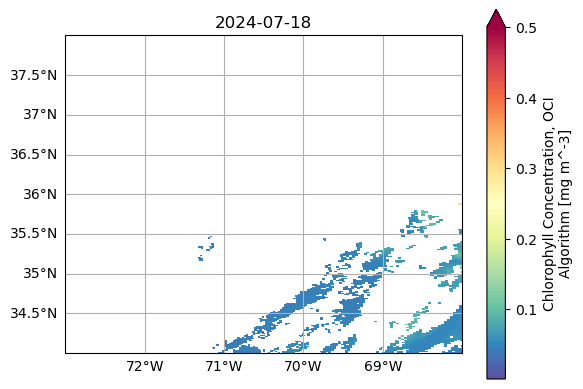

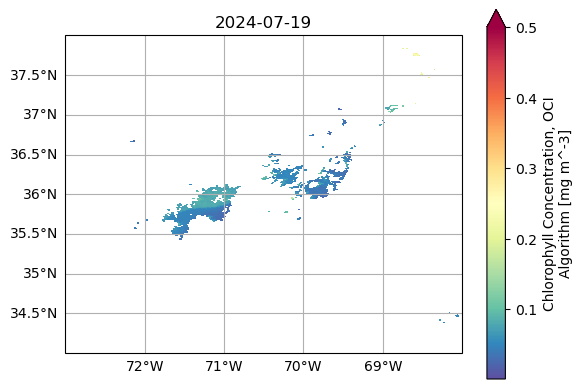

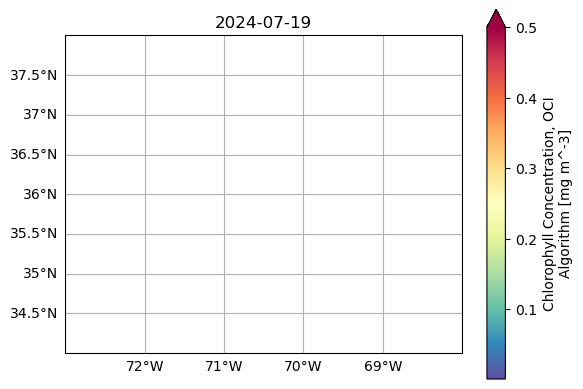

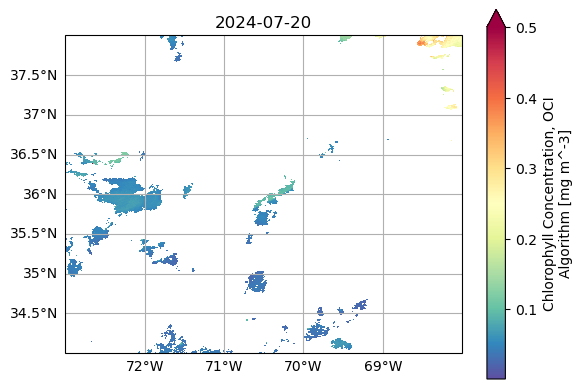

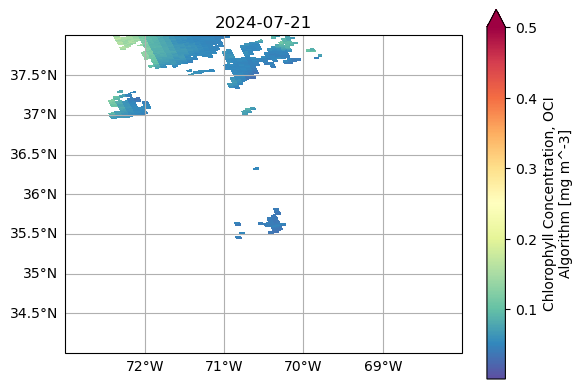

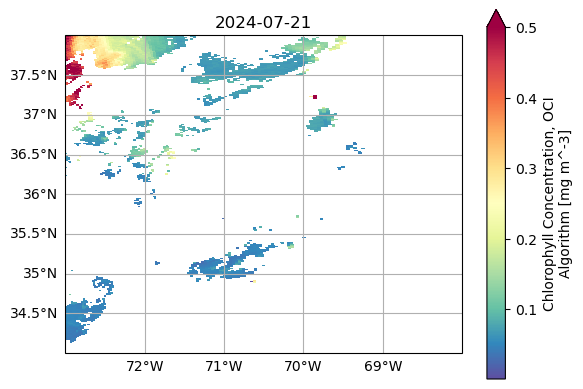

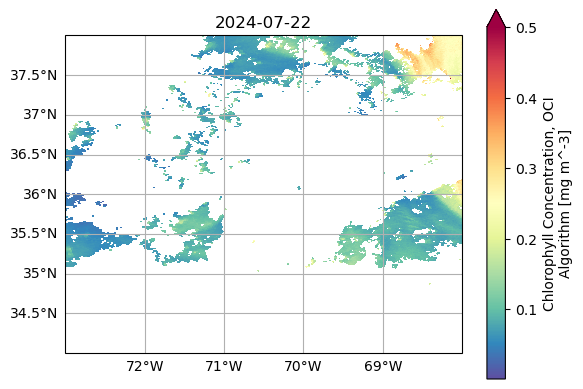

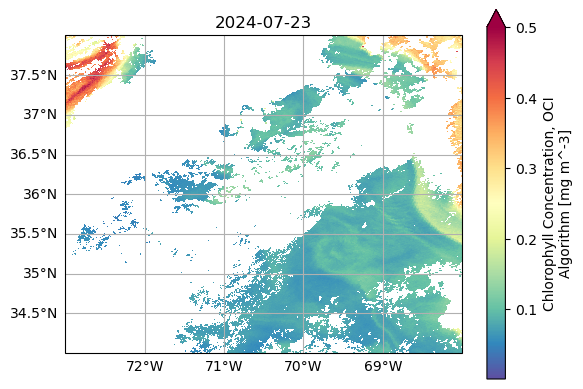

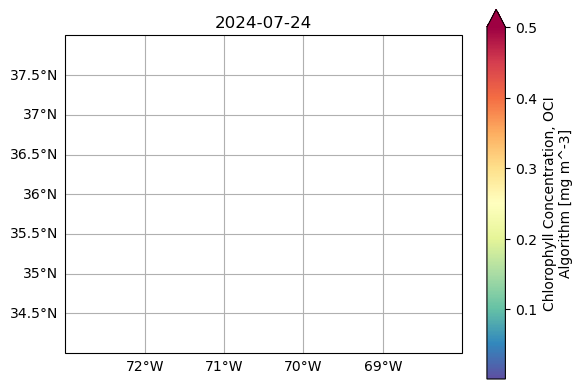

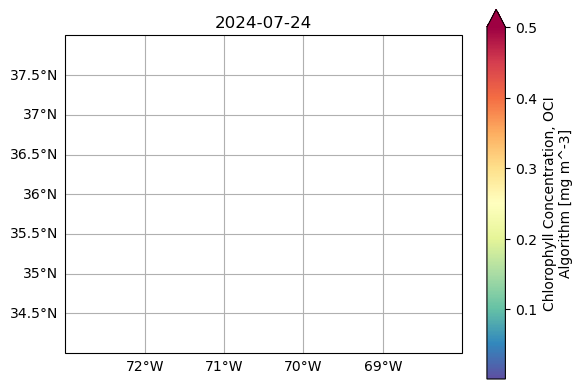

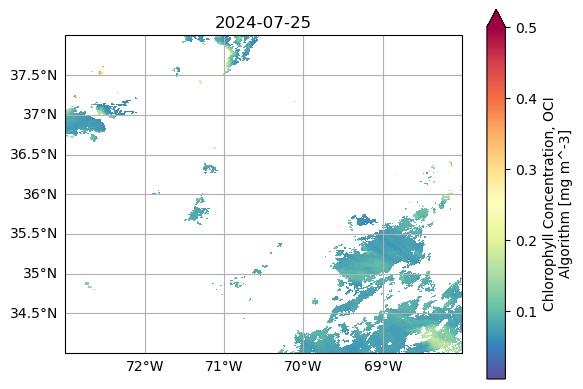

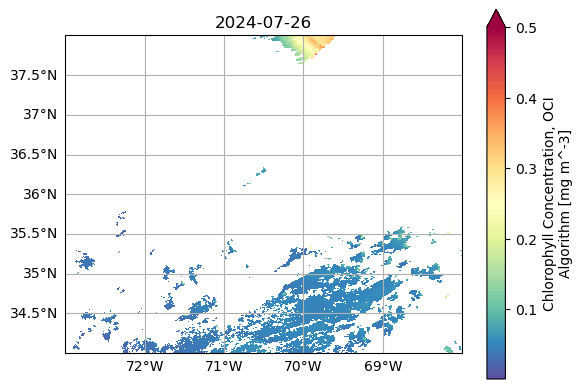

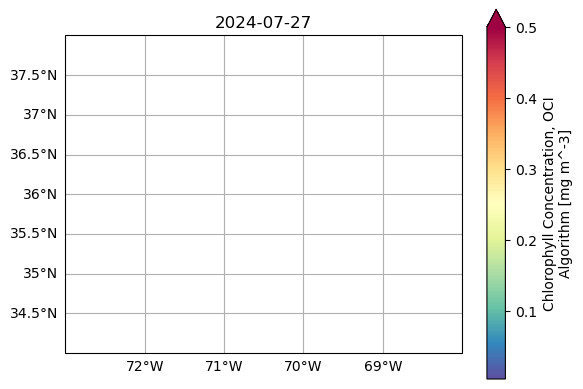

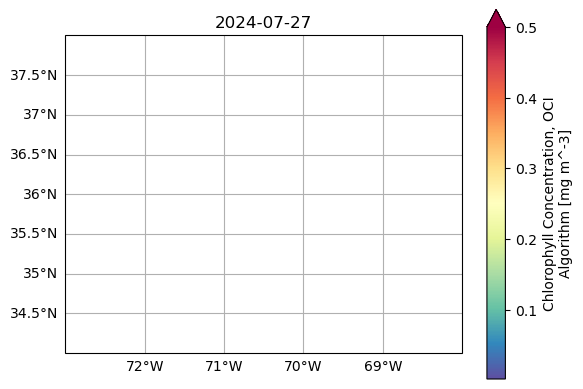

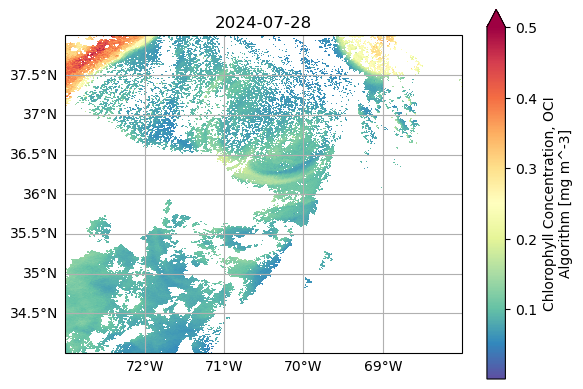

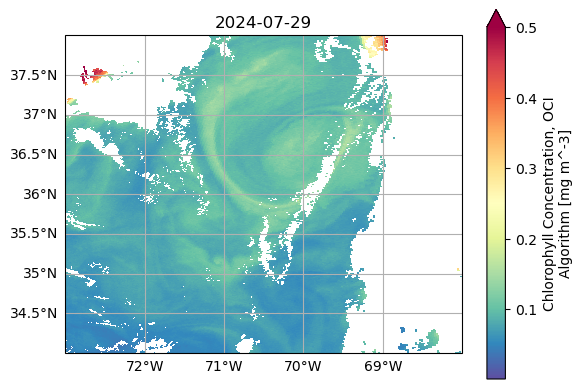

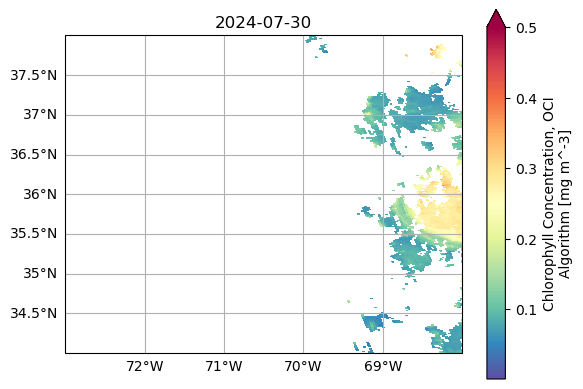

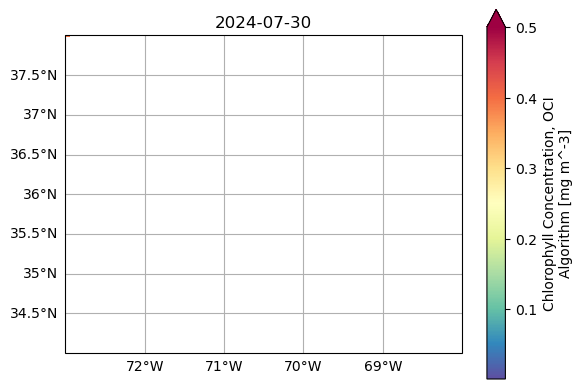

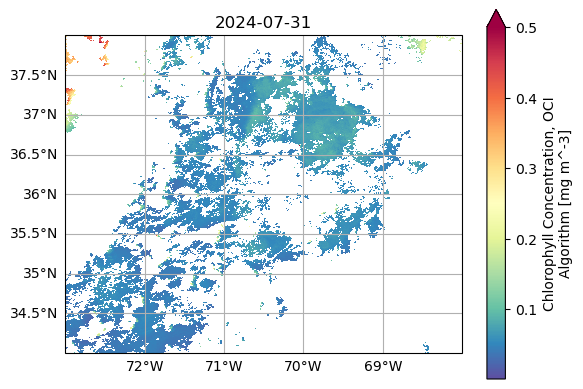

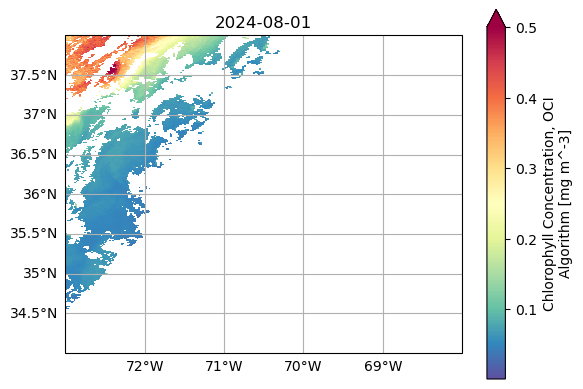

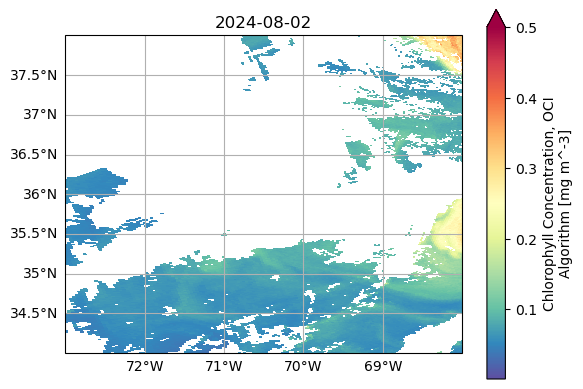

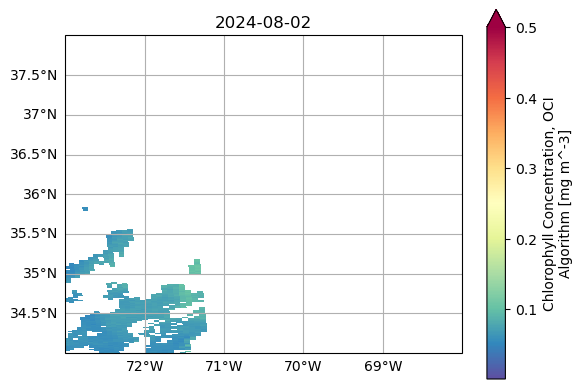

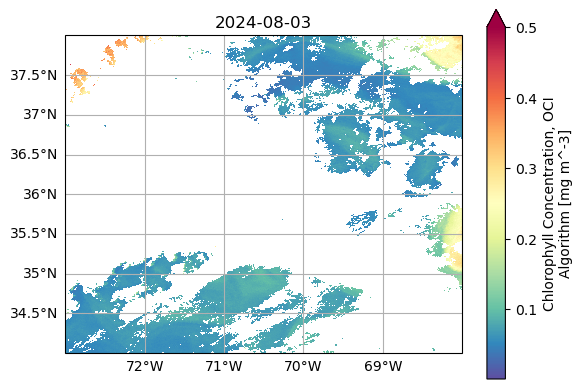

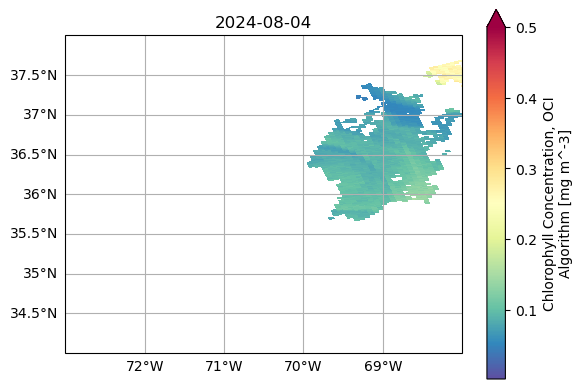

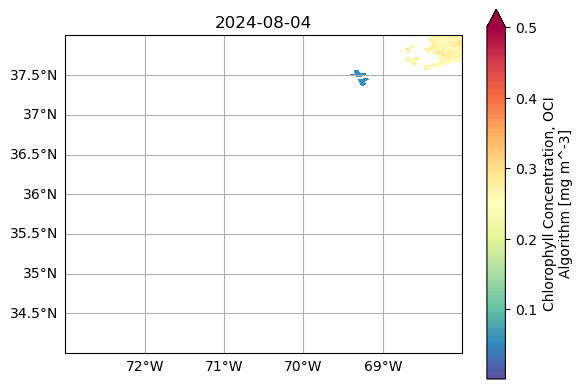

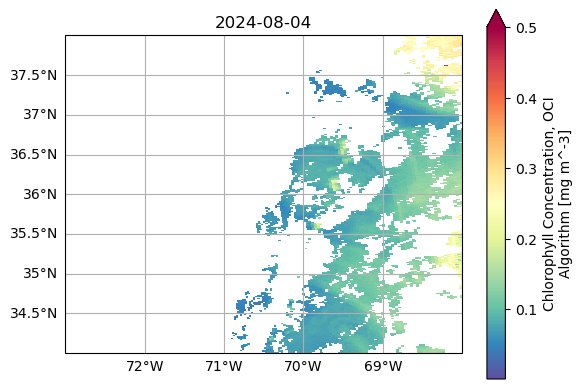

In [11]:
for index in range(0,len(paths)):
    datatree = open_datatree(paths[index])
    datatree
    dataset = xr.merge(datatree.to_dict().values())
    dataset
    dataset = dataset.set_coords(("longitude", "latitude"))
    fig = plt.figure()
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    ax.gridlines(draw_labels={"left": "y", "bottom": "x"})
    plot = dataset["chlor_a"].plot(x="longitude", y="latitude", cmap="Spectral_r", vmax=0.5, ax=ax)
    ax.set_ylabel('latitude')
    ax.set_xlabel('longitude')
    ax.set_ylim([34,38])
    ax.set_xlim([-73,-68])
    # ax.set_ylim([34,39]) #Patrick
    # ax.set_xlim([-62.5,-57.5]) #Patrick
    h=str(paths[index])
    datey=h[64:72]
    ax.set_title(datey[0:4]+'-'+datey[4:6]+'-'+datey[6:len(datey)])
    if len(str(index))==1:
        plt.savefig('edward_CHL'+str(0)+str(0)+str(index).split('.')[0]+'.png')
    elif len(str(index))==2:
        plt.savefig('edward_CHL'+str(0)+str(index).split('.')[0]+'.png')
    else:
        plt.savefig('edward_CHL'+str(index).split('.')[0]+'.png')

In [ ]:
# Get a list of all PNG files in the directory
image_dir = '/home/jovyan/tutorials/'
images = [img for img in os.listdir(image_dir) if img.endswith(".png")]
images.sort()  # Sort the images if needed
# Create a figure and axis for the animation
fig, ax = plt.subplots()

# Function to update the figure for each frame
def update(frame):
    img_path = os.path.join(image_dir, images[frame])
    img = plt.imread(img_path)
    ax.imshow(img)
    ax.axis('off')  # Hide axes
# Create the animation
ani = animation.FuncAnimation(fig, update, frames=len(images), repeat=True)

# Save the animation as a GIF or display it
ani.save('animation_edward_all.gif', writer='imagemagick', fps=3)  # Save as GIF #was fps=2
# plt.show()  # Uncomment to display the animation

print("Animation created successfully.")

In [41]:
# image_dir = '/home/jovyan/tutorials/'
# images = [img for img in os.listdir(image_dir) if img.endswith(".png")]
# images

# for index in range(0,len(images)):
#     filename=images[index]
#     if len(images[index])==12:
#         newfilename=filename[0:6]+str(0)+filename[6:12]
#         os.rename(filename, newfilename)
#     elif len(images[index])==11:
#         newfilename=filename[0:6]+str(0)+str(0)+filename[6:12]
#         os.rename(filename, newfilename)